# Detección de lesiones lumbares


## Aprendizaje Automático

Emiliano Gomez Guerrero | Michel Maris Mora

In [14]:
# !pip install kagglehub

In [15]:
import kagglehub
import pandas as pd
import numpy as np

In [16]:
dataset_path = kagglehub.dataset_download("brendanartley/lumbar-coordinate-pretraining-dataset")
lumbarcoordinate_df = pd.read_csv(dataset_path + "\\coords_rsna_improved.csv")

In [17]:
#lumbarcoordinate_df.set_index("filename", inplace=True)
display(lumbarcoordinate_df)

,Unnamed: 0,series_id,relative_x,relative_y,condition,side,instance_number,study_id,level
0,0,10996,0.521148,0.325282,Left Neural Foraminal Narrowing,L,13,3996069892,L1/L2
1,1,10996,0.516856,0.319701,Right Neural Foraminal Narrowing,R,6,3996069892,L1/L2
2,2,10996,0.493773,0.400966,Left Neural Foraminal Narrowing,L,12,3996069892,L2/L3
3,3,10996,0.504032,0.385531,Right Neural Foraminal Narrowing,R,6,3996069892,L2/L3
4,4,10996,0.487331,0.475040,Left Neural Foraminal Narrowing,L,12,3996069892,L3/L4
...,...,...,...,...,...,...,...,...,...
58730,58730,4294540297,0.511282,0.571751,Spinal Canal Stenosis,R,10,916362094,L3/L4
58731,58731,4294540297,0.308594,0.667969,Spinal Canal Stenosis,L,-1,916362094,L4/L5
58732,58732,4294540297,0.516697,0.671029,Spinal Canal Stenosis,R,9,916362094,L4/L5
58733,58733,4294540297,0.328125,0.796875,Spinal Canal Stenosis,L,-1,916362094,L5/S1


In [18]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
enc.fit(lumbarcoordinate_df[["level"]])


encoded = enc.transform(lumbarcoordinate_df[["level"]])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(["level"]))
lumbarcoordinate_df = pd.concat([lumbarcoordinate_df.drop(columns=["level"]), encoded_df], axis=1)

enc.fit(lumbarcoordinate_df[["side"]])
encoded = enc.transform(lumbarcoordinate_df[["side"]])
encoded_df = pd.DataFrame(encoded, columns=enc.get_feature_names_out(["side"]))
lumbarcoordinate_df = pd.concat([lumbarcoordinate_df.drop(columns=["side"]), encoded_df], axis=1)

display(lumbarcoordinate_df)
lumbarcoordinate_df = lumbarcoordinate_df[lumbarcoordinate_df["instance_number"] <= 1000]


,Unnamed: 0,series_id,relative_x,relative_y,condition,instance_number,study_id,level_L1/L2,level_L2/L3,level_L3/L4,level_L4/L5,level_L5/S1,side_L,side_R
0,0,10996,0.521148,0.325282,Left Neural Foraminal Narrowing,13,3996069892,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,10996,0.516856,0.319701,Right Neural Foraminal Narrowing,6,3996069892,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,10996,0.493773,0.400966,Left Neural Foraminal Narrowing,12,3996069892,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,3,10996,0.504032,0.385531,Right Neural Foraminal Narrowing,6,3996069892,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,4,10996,0.487331,0.475040,Left Neural Foraminal Narrowing,12,3996069892,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58730,58730,4294540297,0.511282,0.571751,Spinal Canal Stenosis,10,916362094,0.0,0.0,1.0,0.0,0.0,0.0,1.0
58731,58731,4294540297,0.308594,0.667969,Spinal Canal Stenosis,-1,916362094,0.0,0.0,0.0,1.0,0.0,1.0,0.0
58732,58732,4294540297,0.516697,0.671029,Spinal Canal Stenosis,9,916362094,0.0,0.0,0.0,1.0,0.0,0.0,1.0
58733,58733,4294540297,0.328125,0.796875,Spinal Canal Stenosis,-1,916362094,0.0,0.0,0.0,0.0,1.0,1.0,0.0


Index(['Unnamed: 0', 'series_id', 'relative_x', 'relative_y',
       'instance_number', 'study_id', 'level_L1/L2', 'level_L2/L3',
       'level_L3/L4', 'level_L4/L5', 'level_L5/S1', 'side_L', 'side_R'],
      dtype='object')


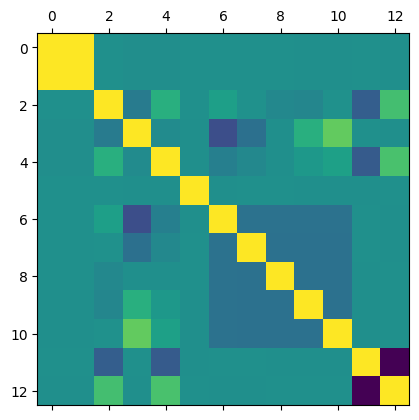

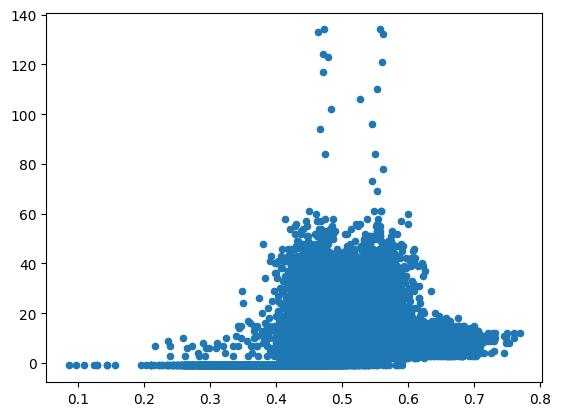

In [19]:
import matplotlib.pyplot as plt

correlation_matrix = lumbarcoordinate_df.corr(numeric_only=True)

print(correlation_matrix.columns)

#Reduce quantity of values for it to be suitable for Normal equation
df_sample = lumbarcoordinate_df.sample(n=20000, random_state=42)

plt.matshow(correlation_matrix)
plt.show()

X = df_sample[["relative_x"]]
y = df_sample[["instance_number"]]
plt.scatter(X,y,s=20)


In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape

(16000, 1)

   instance_number
0        -6.372986
1        33.752035
𝑦 = Θ0 + Θ1*x1
𝑦= 33.75203453312884X + -6.372985581207457


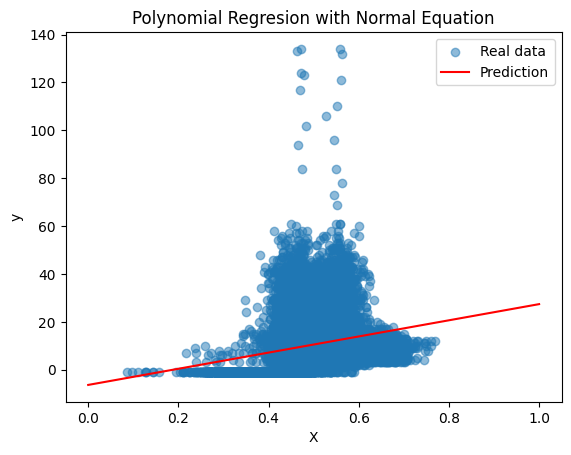

Training:
MSE: 120.172471335022
RMSE: 10.962320526924124
MAE: 7.6681291446728315
Testing:
MSE: 136.20104426642934
RMSE: 11.670520308299427
MAE: 7.812993983869723


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
X_poly = poly.fit_transform(X_train)

theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y_train
print(theta)
theta_arr = theta.to_numpy().ravel()
#Normal Equation
print("𝑦 = Θ0 + Θ1*x1")
print(f"𝑦= {theta_arr[1]}X + {theta_arr[0]}")


x_plt = np.linspace(0, 1, 100).reshape(-1, 1)
x_plt_b = np.hstack([np.ones((x_plt.shape[0], 1)), x_plt])

y_pred = x_plt_b @ theta

plt.scatter(X, y, alpha=0.5, label='Real data')
plt.plot(x_plt, y_pred, color='r', label='Prediction')
 
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regresion with Normal Equation')
plt.legend()
plt.show()


y_pred = X_poly @ theta

mse = np.mean((y_pred - y_train) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_pred - y_train))
print("Training:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

X_poly = poly.fit_transform(X_test)
y_pred = X_poly @ theta

print("Testing:")
mse = np.mean((y_pred - y_test) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_pred - y_test))
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)


In [22]:
class LinearReg: 

    def __init__(self, lr = 0.01, epoch = 100):
        self.lr = lr
        self.epoch = epoch
        self.weights = None
        self.bias = None

    def fit(self, X, y, debug=False):
        # M is the size of samples
        # N is the size of features

        m, n = X.shape
        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        y = y.values.reshape(m,1)

        losses = list()
        b_list = list()
        w_list = list()

        for epoch in range(self.epoch):
            # Calculate prediction
            y_hat = np.dot(X,self.weights) + self.bias
            # Save current loss
            loss = np.mean((y_hat - y)**2)
            losses.append(loss)
            # Calculate gradient
            dw = (-2/m) * np.dot(X.T,(y - y_hat))
            db = (-2/m) * np.sum(y - y_hat)
            # Update params
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db
            # Save params
            w_list.append(self.weights)
            b_list.append(self.bias)
            if debug:
                display(f"epoch: {epoch}, loss: {loss}, weight: {self.weights}, bias: {self.bias}")

        if debug:
            plt.subplot(1,2,1)
            plt.plot(range(self.epoch), losses)
            plt.xlabel("Iterations/Epochs")
            plt.ylabel("Loss/y/f(x)/J/C")
            plt.figure(0)

    def predict(self, X, y, debug=False):
        m, n = X.shape
        y = y.values.reshape(-1,1)
        y_hat = self.weights * X + self.bias
        loss = np.mean((y_hat - y)**2)
        if debug:
            print("bias:",self.bias)
            print("Wheight:",self.weights)
            print(f"loss = {loss}")
        return y_hat

Training:
MSE: 103.66512724661222
RMSE: 10.181607301728555
MAE: 6.994719837430201
Testing:
MSE: 101.28358293006592
RMSE: 10.063974509609308
MAE: 6.9201061744209005


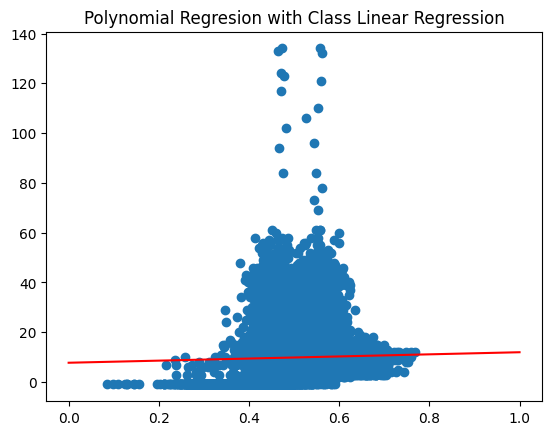

<Figure size 640x480 with 0 Axes>

In [23]:
model = LinearReg(.01,100)
model.fit(X_train, y_train)
y_pred = model.predict(X_train, y_train)

x_plt = np.linspace(0,1,100)
y_plt = model.weights[0][0] * x_plt + model.bias[0]
plt.scatter(X,y)
plt.title('Polynomial Regresion with Class Linear Regression')
plt.plot(x_plt,y_plt, 'r')
plt.figure(3)


mse = np.mean((y_pred.values - y_train) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_pred.values - y_train))
print("Training:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

y_pred = model.predict(X_test, y_test)

print("Testing:")
mse = np.mean((y_pred.values - y_test) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_pred.values - y_test))
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

c:\Users\emi_g\anaconda3\envs\mi_ambiente\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(


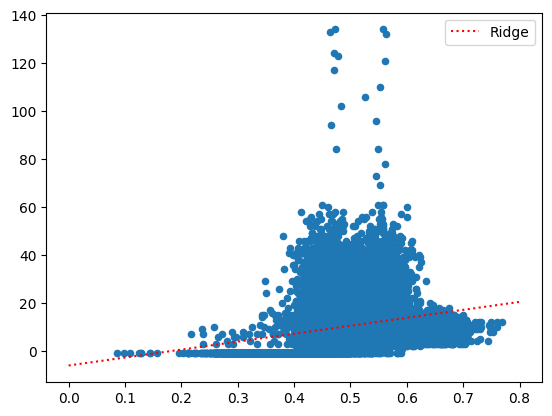

(16000, 1)
(16000, 1)
Training:
MSE: 97.33521419934209
RMSE: 9.865861047031936
MAE: 6.946054216472876
Testing:
MSE: 95.98263524737565
RMSE: 9.797072789735497
MAE: 6.901959050278088


In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=2)

ridge.fit(X_train,y_train)

X_plot = np.linspace(0,.8,100).reshape(-1,1)

y_plot_ridge = ridge.predict(X_plot)

plt.scatter(X,y,s=20)
plt.plot(X_plot, y_plot_ridge, color="r", linestyle=":",   label="Ridge")
plt.legend()
plt.show()


y_pred = ridge.predict(X_train)
y_pred = y_pred.reshape(-1,1)
print(y_pred.shape)
print(y_train.shape)

mse = np.mean((y_pred - y_train) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_pred - y_train))
print("Training:")
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)

y_pred = ridge.predict(X_test)
y_pred = y_pred.reshape(-1,1)

print("Testing:")
mse = np.mean((y_pred - y_test) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_pred - y_test))
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)